FFR 120  
Felix Waldschock

HW 2  
Exercise 7.6

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [240]:
# parameters
n_drift = 20
n_diff = 1

L = 100         # length of the box
sigma = 1       
dT = 0.01
dT = 1
x0 = 0          # initial position of the particle
alpha = 1
sigma0 = 1
dSigma = 1.8 



In [241]:
# Simulation parameters
N = 50                                   # number of trajectiories (particles)
T_tot = [10, 100, 1000, 10000, 100000]      # total time
#T_tot = [10, 100, 1000, 10000]              # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 
max_steps = int(np.max(Iteration_Steps))    # maximum number of steps



In [242]:
def getDrift(x, x_old):
    displacement = x - x_old
    return displacement / (n_drift * dT)

In [243]:
def getDiff(x, x_old):
    displacement = x - x_old
    return (displacement**2) / (2 * n_diff * dT)

In [244]:
# constant noise simulation ex 7.2

def simulate_trajectory_constant(N, max_steps, L):
    x = np.zeros(N)*x0
    x_init = np.linspace(-L/2, L/2, N)
    x = x_init
    x_old_drift = np.zeros(N)
    x_old_diff = np.zeros(N)
    trajectories = np.zeros((N, len(T_tot)))                             # array to store trajectories  
    sigmas_ = np.zeros(N)                                                # array to store sigmas
    drift = np.zeros(N)                                                  # array to store drift
    diffusion = np.zeros(N)                                              # array to store diffusion
    
    for s in trange(max_steps):
        # calc new sigma
        o = sigma * np.sqrt(dT)
        directions = np.random.choice([-1, 1], N)
        x += directions * o
        
        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)

        
        if (s%n_drift == 0):
            # calc drift and diffusion
            drift += getDrift(x, x_old_drift)
            x_old_drift = x.copy()
        
        if (s%n_diff == 0):
            diffusion += getDiff(x, x_old_diff)
            x_old_diff = x.copy()
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

    trajectories[:, -1] = x
    sigmas_[:] = sigma

    # average the drift and diffusion
    drift = drift / (max_steps / n_drift)
    diffusion = diffusion / (max_steps / n_diff)
    
    return trajectories, sigmas_, drift, diffusion, x_init

In [245]:
# multiplicative noise 
def simulate_trajectory_multiplicative(N, max_steps, L, alpha):
    x = np.ones(N)*x0
    x_init = np.linspace(-L/2, L/2, N)
    x = x_init
    x_old_drift = np.ones(N)*x0
    x_old_diff = np.ones(N)*x0
    trajectories = np.zeros((N, len(T_tot)))                            # array to store trajectories  
    sigmas_ = np.zeros(N)                                               # array to store sigmas
    drift = np.zeros(N)                                                 # array to store drift
    diffusion = np.zeros(N)                                             # array to store diffusion


    for s in trange(max_steps):
        
        # get new noise
        sigma = np.zeros(N)
        # multiplicative noise
        tmp1 = sigma0 + dSigma*x/L
        tmp2 = dSigma * dT / L
        tmp3 = tmp1 * np.sqrt(dT)
        direction = np.random.choice([-1,1], N)
        sigma = alpha * tmp1 * tmp2 + tmp3 * direction
        
        x += sigma

        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)

        if (s%n_drift == 0):
            # calc drift and diffusion
            drift += getDrift(x, x_old_drift)
            x_old_drift = x.copy()
        
        if (s%n_diff == 0):
            diffusion += getDiff(x, x_old_diff)
            x_old_diff = x.copy()
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

        

    trajectories[:, -1] = x
    sigmas_ = sigma


    # average the drift and diffusion
    drift = drift / (max_steps / n_drift)
    diffusion = diffusion / (max_steps / n_diff)

    return trajectories, sigmas_, drift, diffusion, x_init


In [246]:
# Run constant simulation
trajectories_constant, sigmas_constant, drift_constant, diffusion_constant, x_init_const= simulate_trajectory_constant(N, max_steps, L)


100%|██████████| 100000/100000 [00:01<00:00, 53746.34it/s]


In [247]:
# Run multiplicative simulation
trajectories_multiplicative, sigmas_multiplicative, drift_multiplicative, diffusion_multiplicative, x_init_mul = simulate_trajectory_multiplicative(N, max_steps, L, alpha)

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:02<00:00, 39140.11it/s]


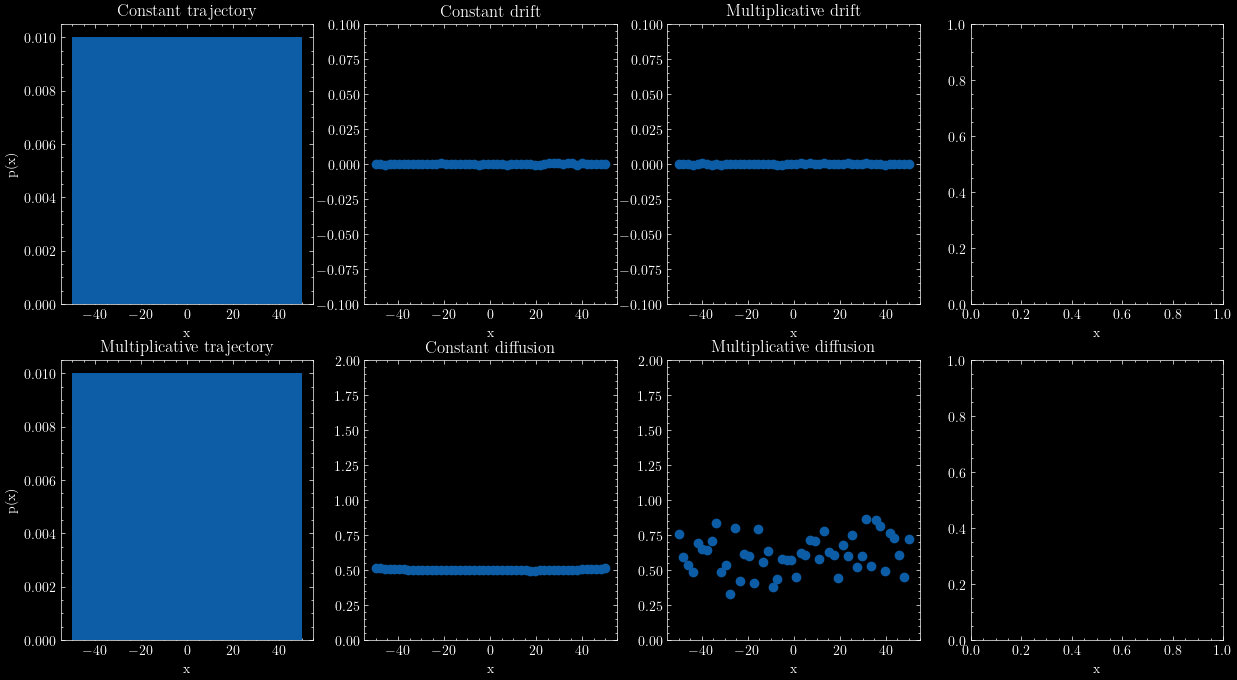

In [248]:
# plot a 2x3 subplot
fig, axs = plt.subplots(2, 4, figsize=(15,8))
x_init = np.linspace(-L/2, L/2, N)


# plot the constantDrift and conStantDiffusion in 1 and 2
axs[0, 0].hist(x_init, bins=50, density=True, label='constant drift')
axs[0, 0].set_title('Constant trajectory')
axs[0, 0].set(ylabel='p(x)')

axs[1, 0].hist(x_init, bins=50, density=True, label='multiplicative trajectory')
axs[1, 0].set_title('Multiplicative trajectory')
axs[1, 0].set(ylabel='p(x)')

axs[0, 1].scatter(x_init, drift_constant, label='constant noise')
axs[0, 1].set_title('Constant drift')
axs[0, 1].set_ylim(-0.1, 0.1)
axs[1, 1].scatter(x_init, diffusion_constant, label='constant noise')
axs[1, 1].set_title('Constant diffusion')
axs[1, 1].set_ylim(-0, 2)


axs[0, 2].scatter(x_init, drift_multiplicative, label='multiplicative noise')
axs[0, 2].set_title('Multiplicative drift')
axs[0, 2].set_ylim(-0.1, 0.1)
axs[1, 2].scatter(x_init, diffusion_multiplicative, label='multiplicative noise')
axs[1, 2].set_title('Multiplicative diffusion')
axs[1, 2].set_ylim(-0, 2)

#axs[1, 3].hist(diffusion_multiplicative, bins=50, density=True, label='constant noise')



# axs[1, 1].hist(diffusion_constant, bins=50, density=True,)
# axs[1, 1].set_title('Constant diffusion')

# axs[0, 2].hist(drift_multiplicative, bins=50, density=True,)
# axs[0, 2].set_title('Multiplicative drift')
# axs[1, 2].hist(diffusion_multiplicative[:,0], bins=50, density=True,)
# axs[1, 2].set_title('Multiplicative diffusion')



# set x label for all plots "x"
for ax in axs.flat:
    ax.set(xlabel='x')